# **Feature engineering : Mutual Information**

Feature engineering and mutual information (MI) are closely related concepts in the context of machine learning and data analysis. Here's how they intersect:

1. **Feature Engineering**:
   - Feature engineering involves creating new features or transforming existing ones to improve model performance. This can include selecting relevant features, creating interaction terms, handling missing values, scaling features, etc.
   - The goal of feature engineering is to provide the machine learning model with the most informative and relevant features to make accurate predictions or classifications.

2. **Mutual Information (MI)**:
   - Mutual information is a statistical measure that quantifies the amount of information obtained about one random variable through another random variable. It measures the dependency between two variables.
   - In the context of feature selection, mutual information is used to assess the relevance of features with respect to the target variable. Features with higher mutual information scores are considered more informative and potentially more predictive.

How They Work Together:

1. **Feature Selection**:
   - Mutual information can be used as a criterion for feature selection. Instead of relying solely on correlation or statistical tests, mutual information can capture nonlinear and complex relationships between features and the target variable.
   - Features with high mutual information scores with the target variable are likely to be more predictive and thus selected for inclusion in the model.
   - By leveraging mutual information, feature selection can be more robust, especially in cases where the relationships between features and the target are not linear or straightforward.

2. **Feature Creation**:
   - Mutual information can guide the creation of new features. By computing mutual information between different feature combinations and the target variable, you can identify potentially informative interactions or transformations.
   - New features created based on mutual information analysis may capture important information that was not apparent in the original dataset.

In summary, mutual information plays a crucial role in both feature selection and feature creation during the feature engineering process. It helps ensure that the selected features are relevant and informative for building accurate predictive models.

# **Interpreting Mutual Information Scores**

Interpreting mutual information (MI) scores involves understanding the level of dependency or information shared between two variables. MI measures how much information about one variable (e.g., a feature) can be obtained by observing another variable (e.g., the target variable) and vice versa. Here are some key points to consider when interpreting MI scores:

**Range of MI Scores:** Mutual information scores typically range from 0 to positive infinity. A score of 0 indicates no mutual information or independence between the variables, while higher scores indicate stronger dependencies or information shared between the variables.

**High MI Score:** A high MI score between two variables suggests a strong relationship or dependency. In the context of feature selection, features with high MI scores with the target variable are considered more informative and potentially more predictive.

**Low MI Score:** A low MI score indicates little to no relationship or dependency between the variables. In feature selection, features with low MI scores with the target variable may be less informative and can potentially be discarded to reduce dimensionality and improve model performance.

**Interpretation Relative to Other Features:** MI scores should be interpreted relative to other features in the dataset. Features with higher MI scores relative to others are likely to be more informative for predicting the target variable.

**Nonlinear Relationships:** MI can capture nonlinear relationships between variables, unlike correlation coefficients, which only measure linear relationships. Therefore, MI is valuable for capturing complex dependencies that may not be apparent from linear relationships alone.

Information Gain: MI can also be interpreted as the amount of information gained about one variable by observing another variable. Higher MI scores indicate greater information gain and suggest that one variable provides more information about the other.

Domain Knowledge: Interpretation of MI scores should also consider domain knowledge and context-specific information. Features that intuitively have a strong influence on the target variable may not always have the highest MI scores, especially in complex datasets with nonlinear relationships.

In summary, interpreting MI scores involves assessing the strength of the relationship or dependency between variables, considering the context of the analysis, and using MI as a tool for feature selection or understanding the predictive power of features in a machine learning model.




In this notebook, we utilize the Automobile dataset available at https://www.kaggle.com/datasets/toramky/automobile-dataset. This dataset comprises information on 193 cars from the 1985 model year. The objective is to predict a car's price (the target variable) using 23 features such as make, body_style, and horsepower. Our aim in this example is to rank the features based on their mutual information scores and then explore the results through data visualization techniques.





In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("/content/sample_data/Automobile_data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non


The scikit-learn algorithm for Mutual Information (MI) operates differently on discrete features compared to continuous features. Hence, it's necessary to specify the nature of each feature. As a general guideline, features requiring a float data type are typically not discrete. On the other hand, categorical features (with object or categorical data types) can be considered discrete by applying label encoding to them.

In [ ]:
X = df.copy()
y = X.pop("price")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

# Convert string values in y to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int64  
 2   make               205 non-null    int64  
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    int64  
 7   drive-wheels       205 non-null    int64  
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    int64  
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

Scikit-learn provides two mutual information metrics in its feature_selection module: mutual_info_regression for real-valued targets and mutual_info_classif for categorical targets. If our target variable, in this case, "price," is real-valued, we should use mutual_info_regression to compute the mutual information scores for our features.

In [ ]:

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    # Compute mutual information scores using mutual_info_regression
    # The `discrete_features` parameter is used to specify which features are discrete
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)

    # Convert the scores into a pandas Series, with feature names as indices
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)

    # Sort the Series by MI scores in descending order
    mi_scores = mi_scores.sort_values(ascending=False)

    # Return the sorted MI scores
    return mi_scores


# Compute MI scores
mi_scores = make_mi_scores(X, y_encoded, discrete_features)

# Show features with their MI scores
mi_scores


curb-weight          1.180807
horsepower           1.037694
engine-size          0.913793
highway-mpg          0.823605
city-mpg             0.739234
bore                 0.639980
width                0.637384
stroke               0.636657
wheel-base           0.613166
length               0.582587
normalized-losses    0.558034
make                 0.498911
fuel-system          0.466379
peak-rpm             0.372005
num-of-cylinders     0.329828
drive-wheels         0.294987
height               0.258932
compression-ratio    0.222470
engine-type          0.207836
symboling            0.182188
aspiration           0.081579
body-style           0.074187
fuel-type            0.046591
engine-location      0.034420
num-of-doors         0.014702
Name: MI Scores, dtype: float64

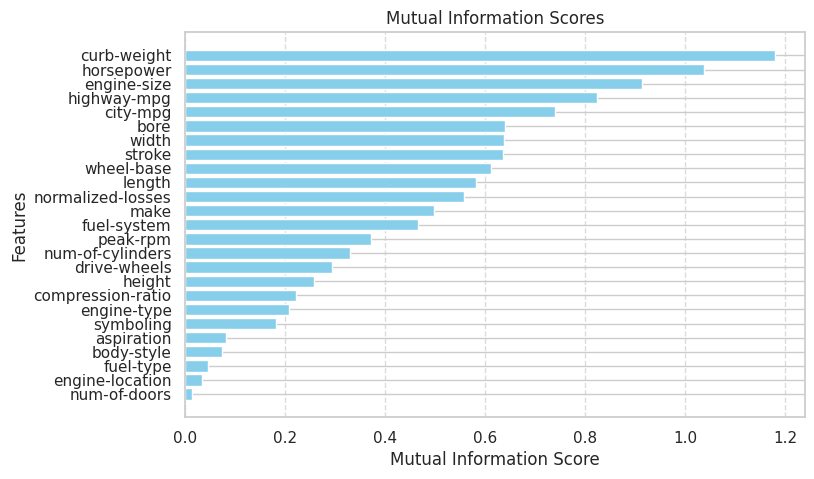

In [ ]:
def plot_mi_scores(scores):
    # Sort scores in ascending order for better visualization
    scores = scores.sort_values(ascending=True)

    # Create a horizontal bar plot
    plt.figure(dpi=100, figsize=(8, 5))
    plt.barh(scores.index, scores, color='skyblue')

    # Add labels and title
    plt.xlabel('Mutual Information Score')
    plt.ylabel('Features')
    plt.title('Mutual Information Scores')

    # Add grid lines
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Show plot
    plt.show()

# Assuming mi_scores is already computed
plot_mi_scores(mi_scores)



After assessing the utility ranking, it's imperative to delve deeper into a few key features through data visualization.

As anticipated, the curb_weight feature, which received a high score, demonstrates a robust relationship with the target variable, price.

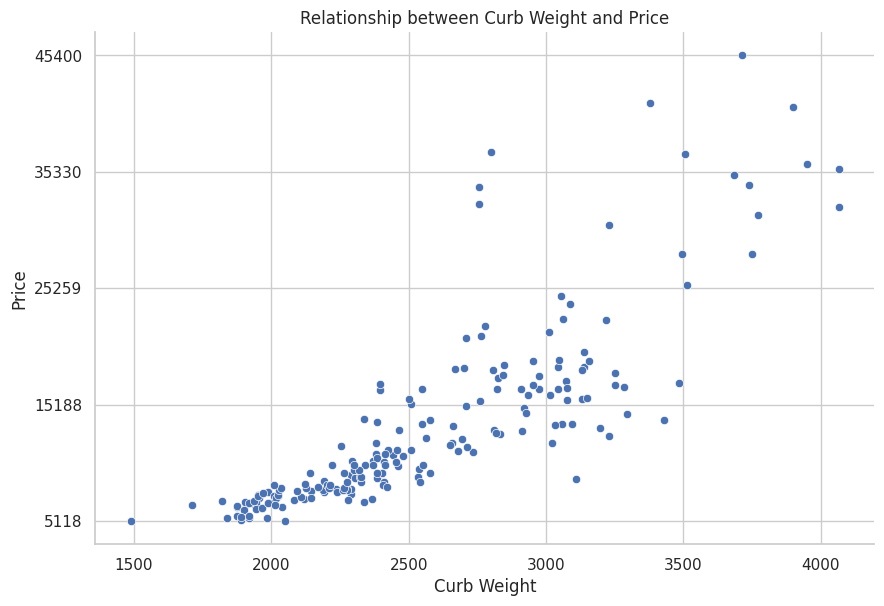

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'price' column to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Set the style and context for the plot
sns.set(style="whitegrid")

# Create the scatter plot
sns.relplot(x="curb-weight", y="price", data=df, height=6, aspect=1.5)

# Add title and axis labels
plt.title("Relationship between Curb Weight and Price")
plt.xlabel("Curb Weight")
plt.ylabel("Price")

# Limit the number of ticks on the price axis
plt.yticks(ticks=np.linspace(df['price'].min(), df['price'].max(), num=5))

# Show plot
plt.show()


Despite the relatively low MI score of the fuel_type feature, the figure reveals a distinct separation of two price populations with differing trends within the horsepower feature. This suggests that fuel_type contributes to an interaction effect, indicating its potential significance. Thus, before concluding that a feature is unimportant solely based on its MI score, it's crucial to investigate any potential interaction effects. Domain knowledge can provide valuable guidance in this regard.

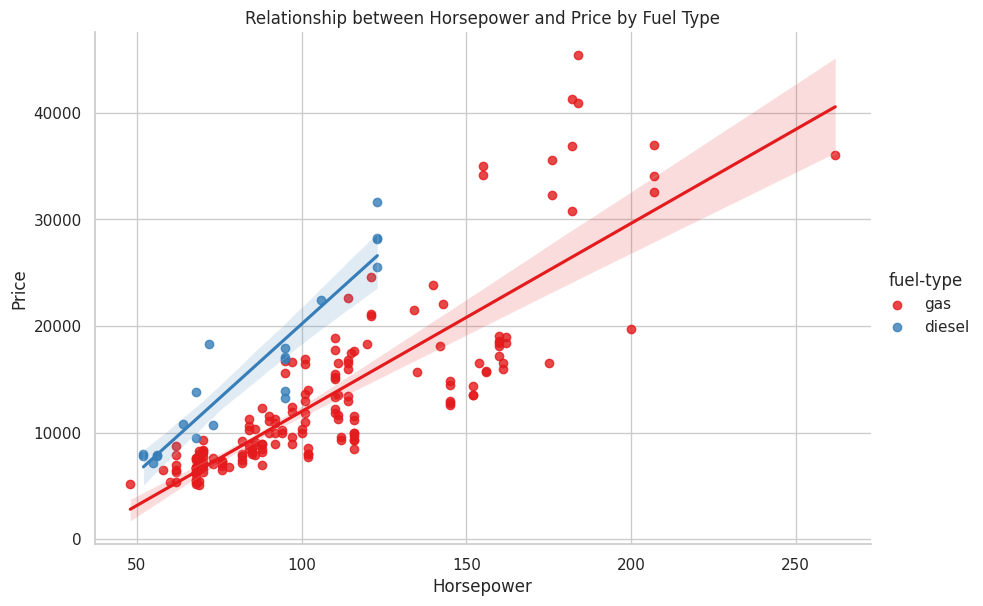

In [ ]:
# Replace '?' with NaN in the DataFrame
df.replace('?', np.nan, inplace=True)

# Convert the 'horsepower' and 'price' columns to numeric
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows with missing values in 'horsepower' or 'price' column
df.dropna(subset=['horsepower', 'price'], inplace=True)

# Now, you can plot the lmplot
sns.lmplot(x="horsepower", y="price", hue="fuel-type", data=df, height=6, aspect=1.5, palette="Set1")
plt.title("Relationship between Horsepower and Price by Fuel Type")
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.show()


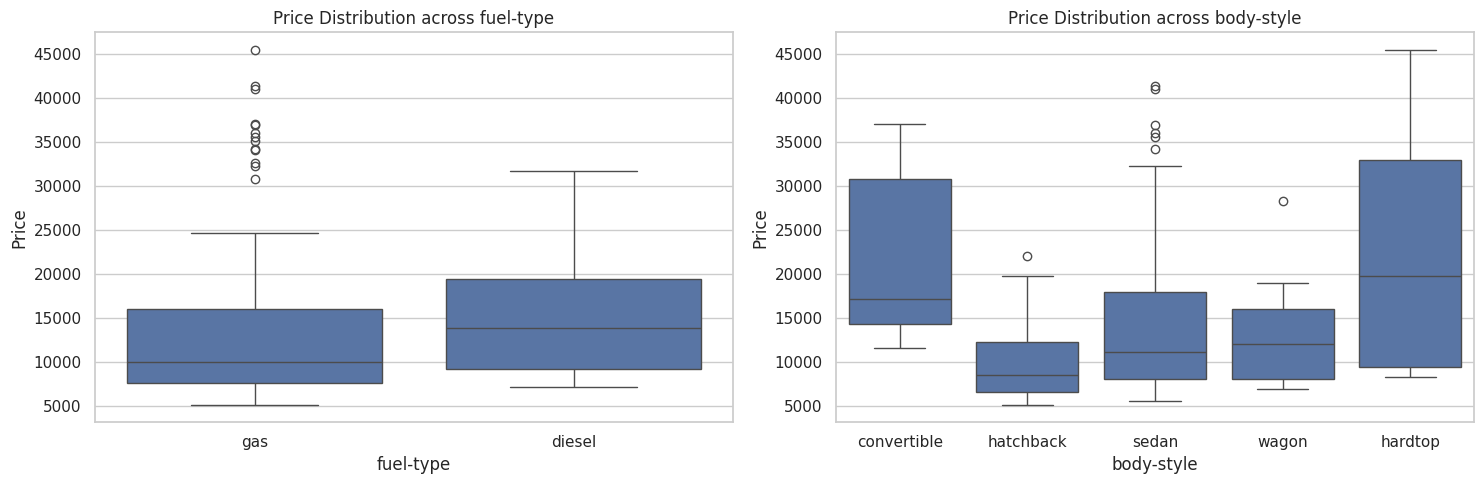

In [ ]:
# List of categorical features to visualize
categorical_features = ['fuel-type', 'body-style']  # Add more features as needed

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_features), figsize=(15, 5))

# Create boxplots for each categorical feature
for i, feature in enumerate(categorical_features):
    sns.boxplot(x=feature, y='price', data=df, ax=axes[i])
    axes[i].set_title(f'Price Distribution across {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


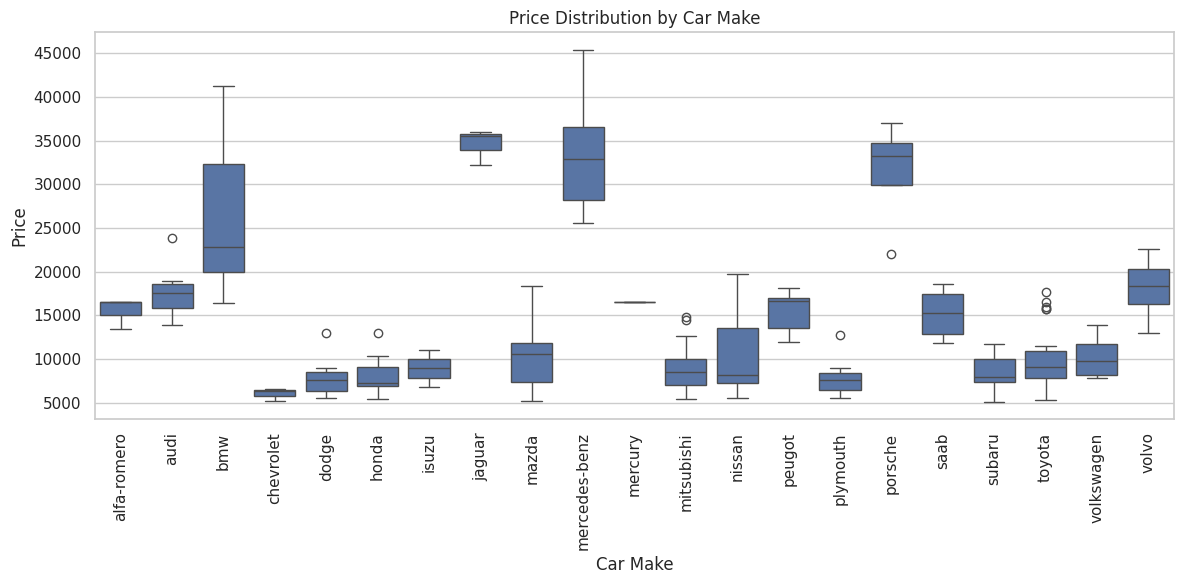

In [ ]:
# Create the boxplot for 'make' feature
plt.figure(figsize=(12, 6))
sns.boxplot(x='make', y='price', data=df)
plt.title('Price Distribution by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


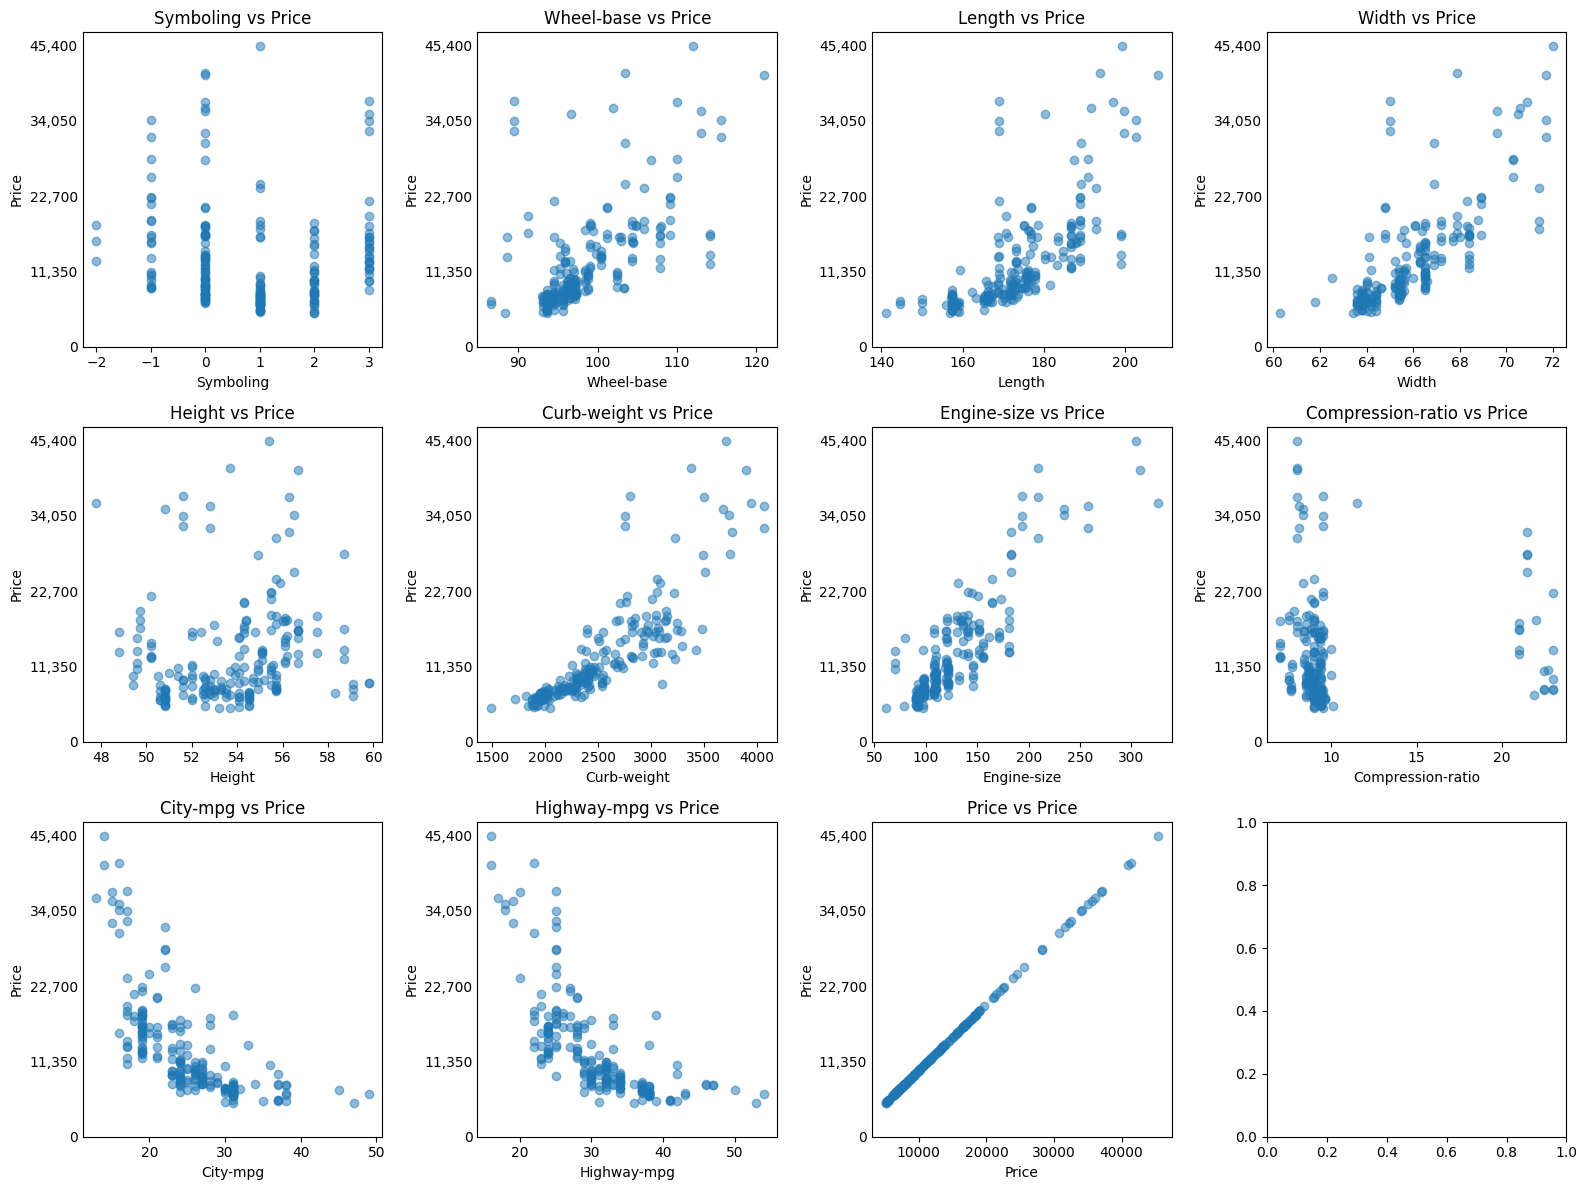

In [10]:
# Convert 'price' column to numeric type
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Selecting only numerical columns
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each numerical variable against 'price'
for i, var in enumerate(numerical_vars):
    axes[i].scatter(df[var], df['price'], alpha=0.5)
    axes[i].set_title(f'{var.capitalize()} vs Price')
    axes[i].set_xlabel(var.capitalize())
    axes[i].set_ylabel('Price')
    axes[i].tick_params(axis='y', which='both', length=0)  # Remove ticks on the y-axis

    # Format price as currency
    axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

    # Set fixed number of ticks on y-axis
    axes[i].yaxis.set_ticks(np.linspace(0, df['price'].max(), num=5))

# Adjust layout
plt.tight_layout()
plt.show()


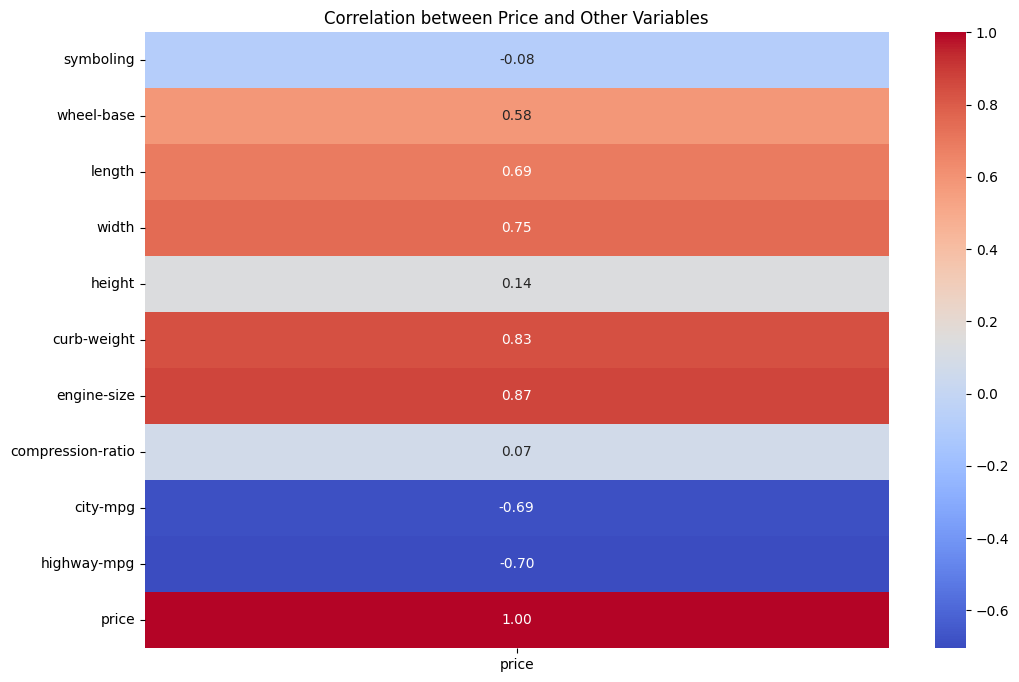

In [8]:
# Selecting only numerical columns
numerical_vars = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr_matrix = numerical_vars.corr()

# Generate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['price']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Price and Other Variables')
plt.show()


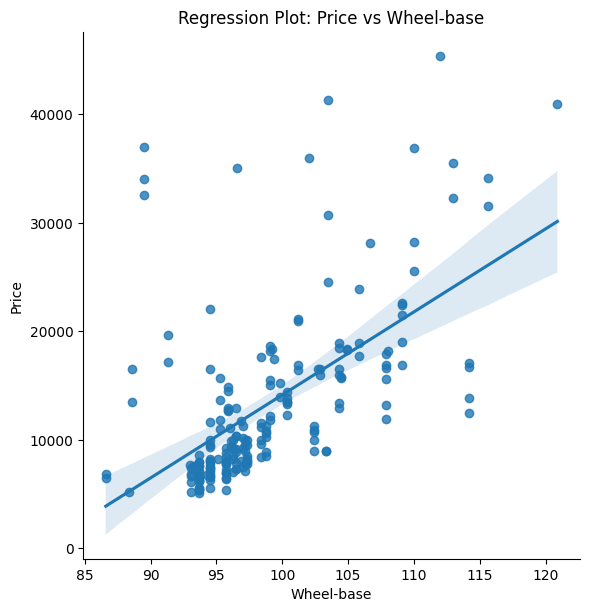

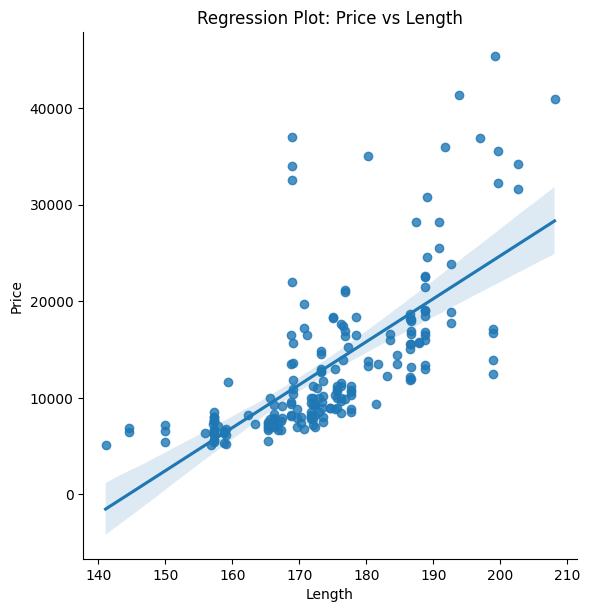

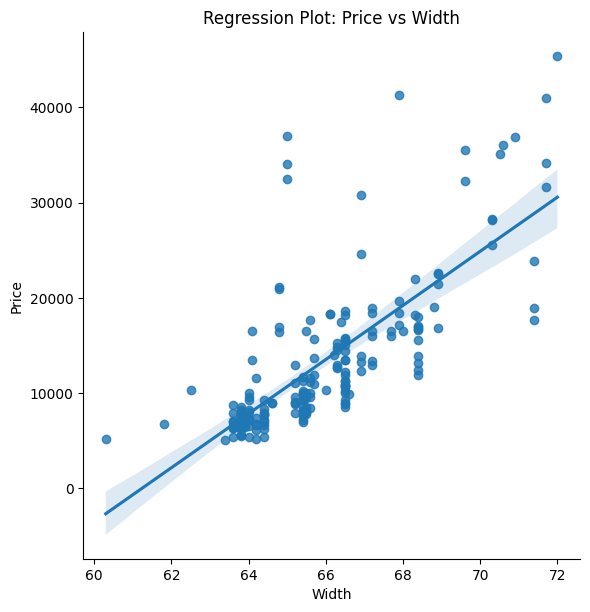

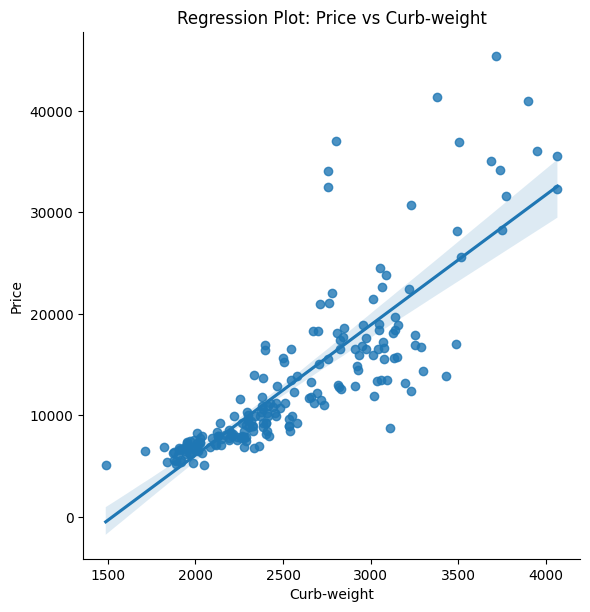

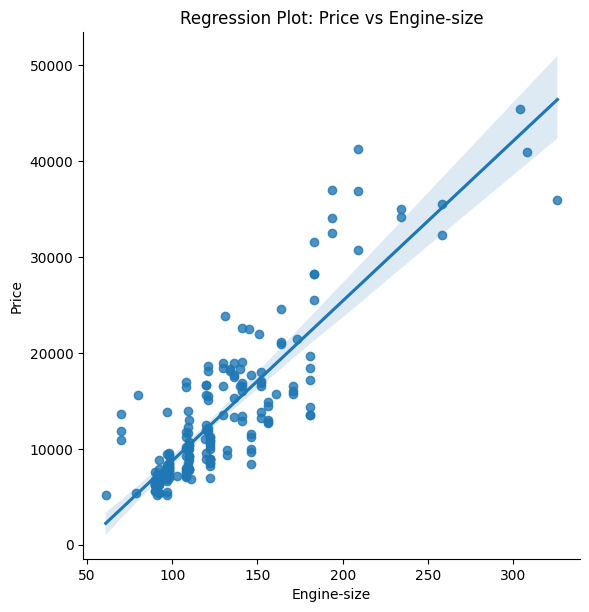

In [9]:
# Selecting only numerical columns
numerical_vars = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr_matrix = numerical_vars.corr()

# Find variables strongly correlated with 'price'
strongly_correlated_vars = corr_matrix['price'][(corr_matrix['price'] > 0.5) & (corr_matrix['price'] < 1.0)].index.tolist()

# Create regression plots for strongly correlated variables
for var in strongly_correlated_vars:
    sns.lmplot(x=var, y='price', data=df, height=6)
    plt.title(f'Regression Plot: Price vs {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Price')
    plt.show()
